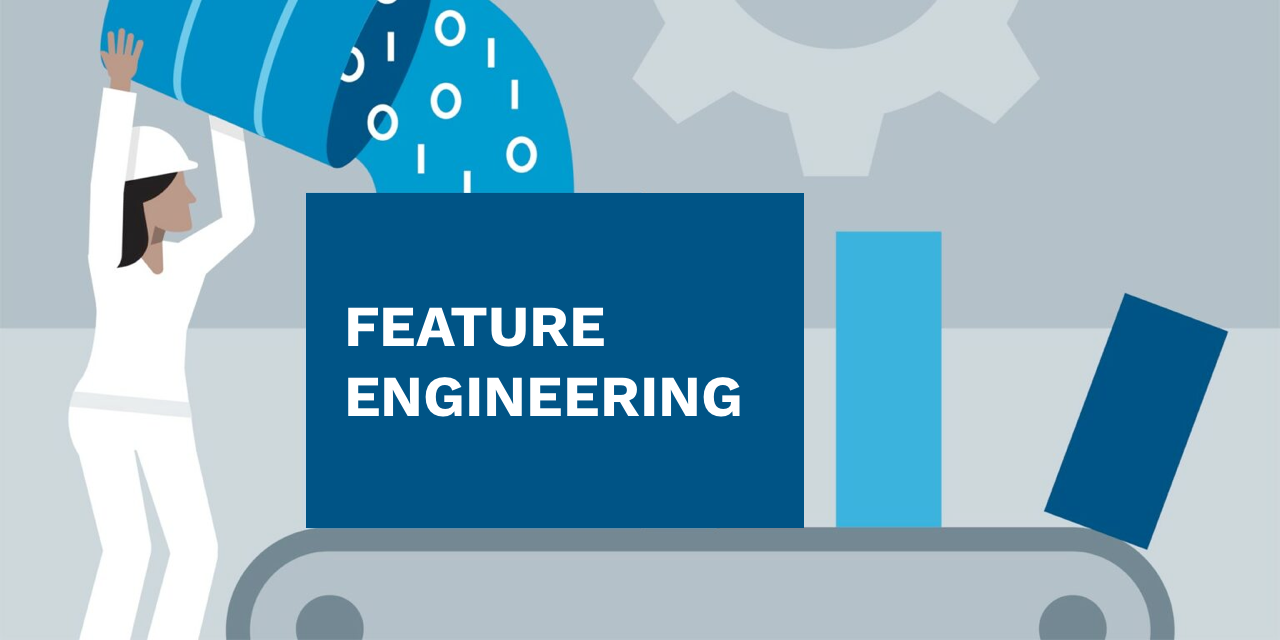

<div style="text-align: center; background-color: #856ff8; padding: 10px;">
    <h2 style="font-weight: bold;">OUTLINE</h2>
</div>

- Importing Various Modules
- Loading Dataset
- Check Correlation using Heatmap
- Hypothesis Testing ( Check Normal Distribution )
    - Shapiro Wick Test
    - K^2 Normality Test
    - Q-Q Plots
- Check for Normal Distribution using Transformations
    - Log Transformation
    - Square-Root Transformation
    - Yeo-Johnson Transformation
- Save Dataframe to CSV File

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">IMPORTING VARIOUS MODULES</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
warnings.filterwarnings("ignore")

%matplotlib inline

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">LOADING DATASET</h2>
</div>

In [2]:
preprocessed_apps_data = pd.read_csv(r'file3_googleplaystore_preprocessed.csv')

In [3]:
# Print top 5 rows in the dataframe.
preprocessed_apps_data.head().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,19.000000,10000,Free,0.000000,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,14.000000,500000,Free,0.000000,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.700000,87510,8.700000,5000000,Free,0.000000,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,25.000000,50000000,Free,0.000000,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,2.800000,100000,Free,0.000000,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [4]:
# Print bottom 5 rows in the dataframe.
preprocessed_apps_data.tail().style.set_properties(**{'background-color': '#E9F6E2','color': 'black','border-color': '#8b8c8c'})

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
10835,Sya9a Maroc - FR,FAMILY,4.500000,38,53.000000,5000,Free,0.000000,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,3.600000,100,Free,0.000000,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,4.300000,3,9.500000,1000,Free,0.000000,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,70.000000,1000,Free,0.000000,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015
10839,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.500000,398307,19.000000,10000000,Free,0.000000,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,25,7,2018


In [5]:
# Print the shape of the DataFrame
print("The shape of data frame:", preprocessed_apps_data.shape)
# Print the length (number of rows) of the DataFrame
print("Number of Rows in the dataframe:", len(preprocessed_apps_data))
# Print the number of columns in the DataFrame
print("Number of Columns in the dataframe:", len(preprocessed_apps_data.columns))

The shape of data frame: (10840, 16)
Number of Rows in the dataframe: 10840
Number of Columns in the dataframe: 16


<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">CHECK CORELATION USING HEATMAP</h2>
</div>

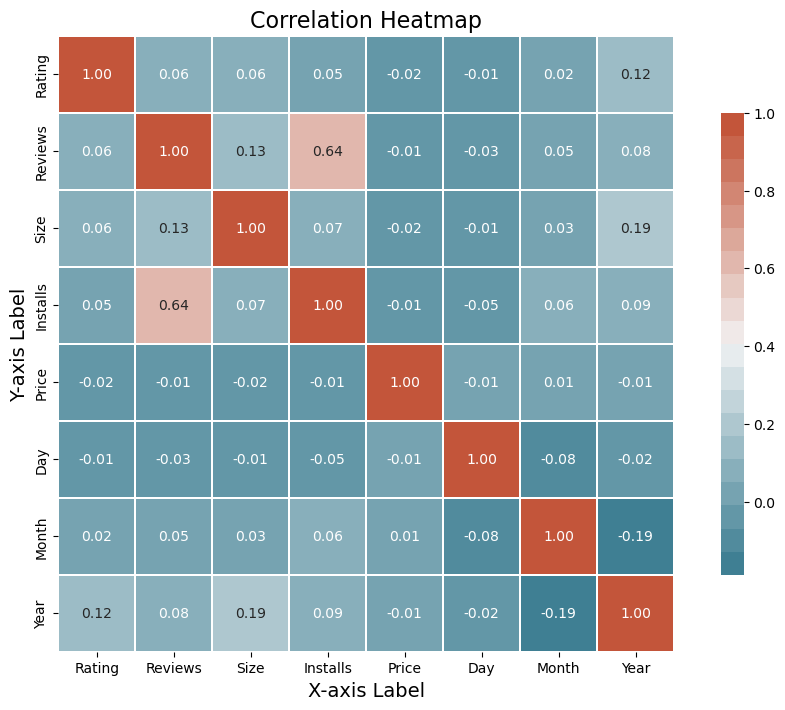

In [6]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Define a custom color palette
custom_palette = sns.diverging_palette(220, 20, n=20)

# Create the heatmap with customizations
heatmap = sns.heatmap(preprocessed_apps_data.corr(), 
                     annot=True,  # Show correlation values
                     cmap=custom_palette,  # Use the custom color palette
                     linewidths=0.2,  # Add linewidth between cells
                     fmt=".2f",  # Format the annotation values to 2 decimal places
                     square=True,  # Make the cells square
                     cbar=True,  # Show the color bar
                     cbar_kws={'shrink': 0.75}  # Customize the color bar size
                    )

# Customize axis labels
plt.xlabel("X-axis Label", fontsize=14)
plt.ylabel("Y-axis Label", fontsize=14)

# Customize the title
plt.title("Correlation Heatmap", fontsize=16)

# Show the plot
plt.show()

<Figure size 1200x600 with 0 Axes>

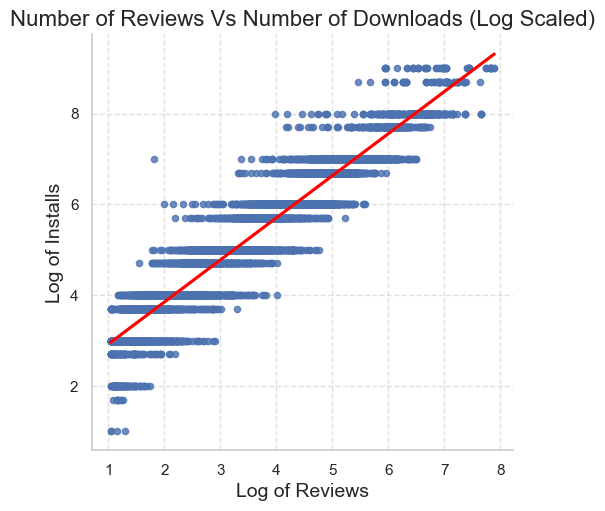

In [7]:
# Create a copy of the DataFrame
preprocessed_apps_data_copy = preprocessed_apps_data.copy()

# Filter the data to remove outliers
preprocessed_apps_data_copy = preprocessed_apps_data_copy[(preprocessed_apps_data_copy['Reviews'] > 10) & (preprocessed_apps_data_copy['Installs'] > 0)]

# Take the logarithm of 'Reviews' and 'Installs' columns
preprocessed_apps_data_copy['Installs'] = np.log10(preprocessed_apps_data_copy['Installs'])
preprocessed_apps_data_copy['Reviews'] = np.log10(preprocessed_apps_data_copy['Reviews'])

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a scatter plot using lmplot
sns.set(style="whitegrid")
sns.lmplot(x="Reviews", y="Installs", data=preprocessed_apps_data_copy, scatter_kws={"s": 20}, line_kws={"color": 'red'})

# Customize axis labels and title
plt.xlabel("Log of Reviews", fontsize=14)
plt.ylabel("Log of Installs", fontsize=14)
plt.title("Number of Reviews Vs Number of Downloads (Log Scaled)", fontsize=16)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

### Insights

**A High positive correlation of 0.9 exists between the number of reviews and number of downloads.** 

- This means that customers tend to download a given app more if it has been reviewed by a larger number of people.

- This also means that many active users who download an app usually also leave back a review or feedback.

- So, getting your app reviewed by more people maybe a good idea to increase your app's capture in the market!

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">HYPOTHESIS TESTING ( CHECK NORMAL DISTRIBUTION )</h2>
</div>

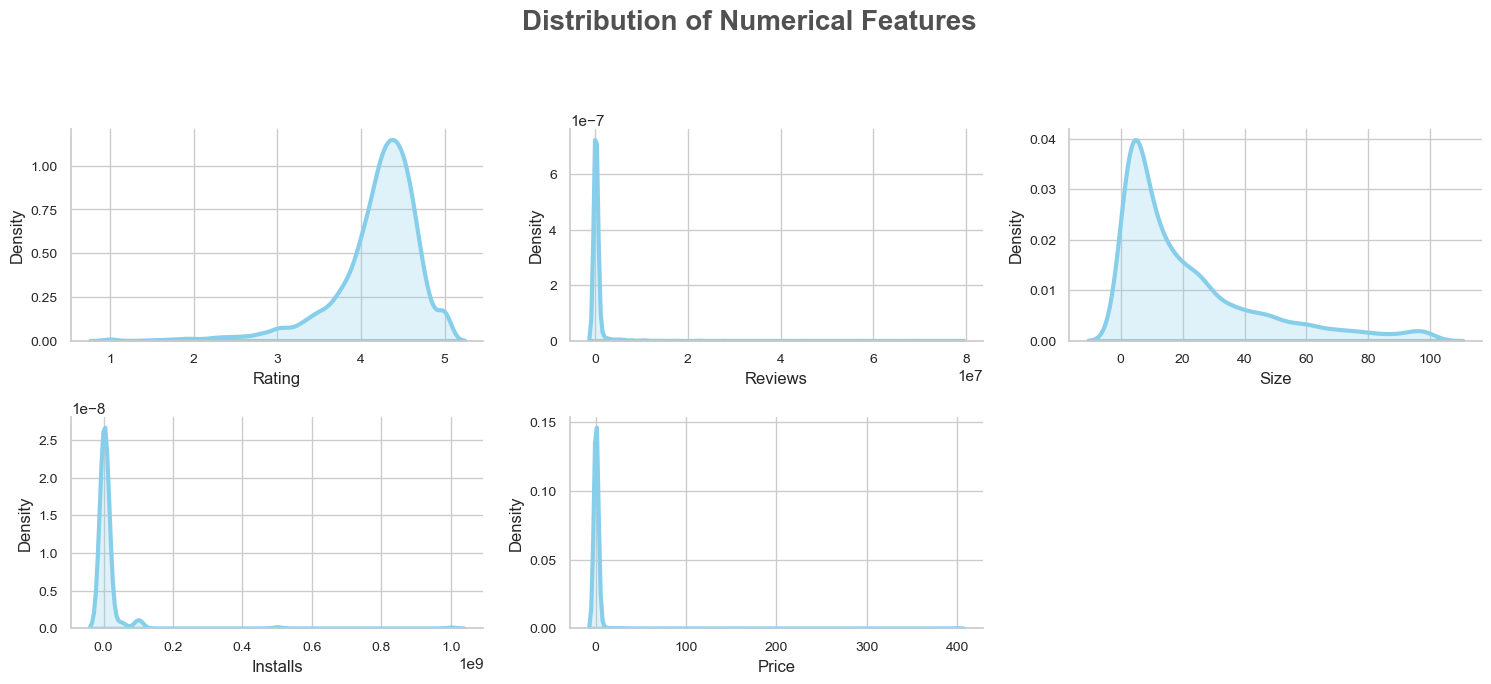

In [8]:
# List of numeric features
numeric_features = [feature for feature in preprocessed_apps_data.columns if preprocessed_apps_data[feature].dtype != 'O']

# Create a figure with subplots
plt.figure(figsize=(15, 15))
plt.suptitle('Distribution of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Limit the number of subplots per row and column
n_rows = 5
n_cols = 3

# List of features to plot (excluding the last 3 features in 'numeric_features')
features_to_plot = numeric_features[:len(numeric_features) - 3]

# Create individual distribution plots
for i, feature in enumerate(features_to_plot):
    plt.subplot(n_rows, n_cols, i + 1)
    
    # Use a customized color palette
    sns.kdeplot(data=preprocessed_apps_data[feature], shade=True, color='skyblue', linewidth=3)
    
    # Set axis labels and customize their appearance
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    
    # Remove spines for a cleaner look
    sns.despine()
    
    # Customize tick label fonts and sizes
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Ensure tight layout for better spacing between subplots
    plt.tight_layout()

# Adjust the layout and spacing
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()

## 1] Shapiro Wick Test

**The Shapiro-Wilk test is a way to tell if a random sample comes from a normal distribution.**
- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [9]:
num_df = preprocessed_apps_data[features_to_plot]

In [10]:
from scipy.stats import shapiro
shapiro_wick_test = []
for column in features_to_plot:
    dataToTest = num_df[column]
    stat,p = shapiro(dataToTest)
    if p > 0.05:
        shapiro_wick_test.append("Normally Distributed")
    else:
        shapiro_wick_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[features_to_plot, shapiro_wick_test]).T
result.columns = ['Column Name', 'Shapiro Hypothesis Result']
result

,Column Name,Shapiro Hypothesis Result
0,Rating,Not Normally Distributed
1,Reviews,Not Normally Distributed
2,Size,Not Normally Distributed
3,Installs,Not Normally Distributed
4,Price,Not Normally Distributed


## 2] K^2 Normality Test

**Test aims to establish whether or not the given sample comes from a normally distributed population. Test is based on transformations of the sample kurtosis and skewness.**
- Ho : Data is normally distributed
- H1 : Data is not normally distributed

In [11]:
from scipy.stats import normaltest
normaltest_test = []
for column in features_to_plot:
    dataToTest = num_df[column]
    stat,p = normaltest(dataToTest)
    if p > 0.05:
        normaltest_test.append("Normally Distributed")
    else:
        normaltest_test.append("Not Normally Distributed")
result = pd.DataFrame(data=[features_to_plot, normaltest_test]).T
result.columns = ['Column Name', 'normaltest Hypothesis Result']
result

,Column Name,normaltest Hypothesis Result
0,Rating,Not Normally Distributed
1,Reviews,Not Normally Distributed
2,Size,Not Normally Distributed
3,Installs,Not Normally Distributed
4,Price,Not Normally Distributed


## 3] Q-Q Plots

**A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a roughly straight line.**

**If the data falls in a straight line then the variable follows normal distribution otherwise not.**

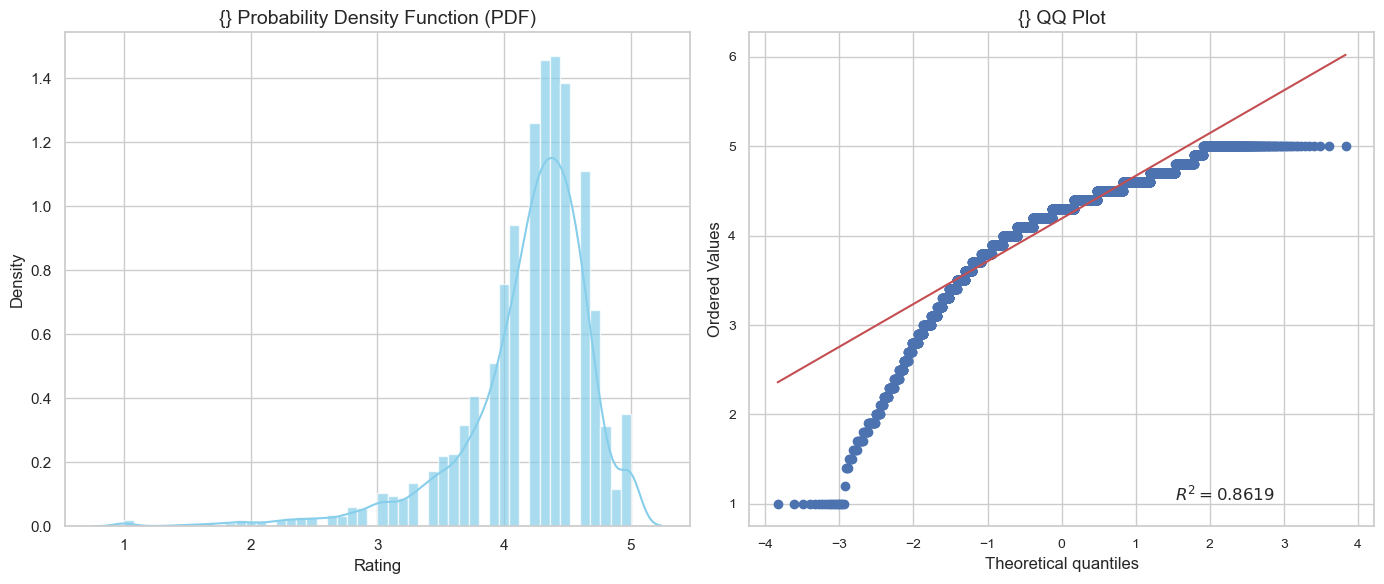

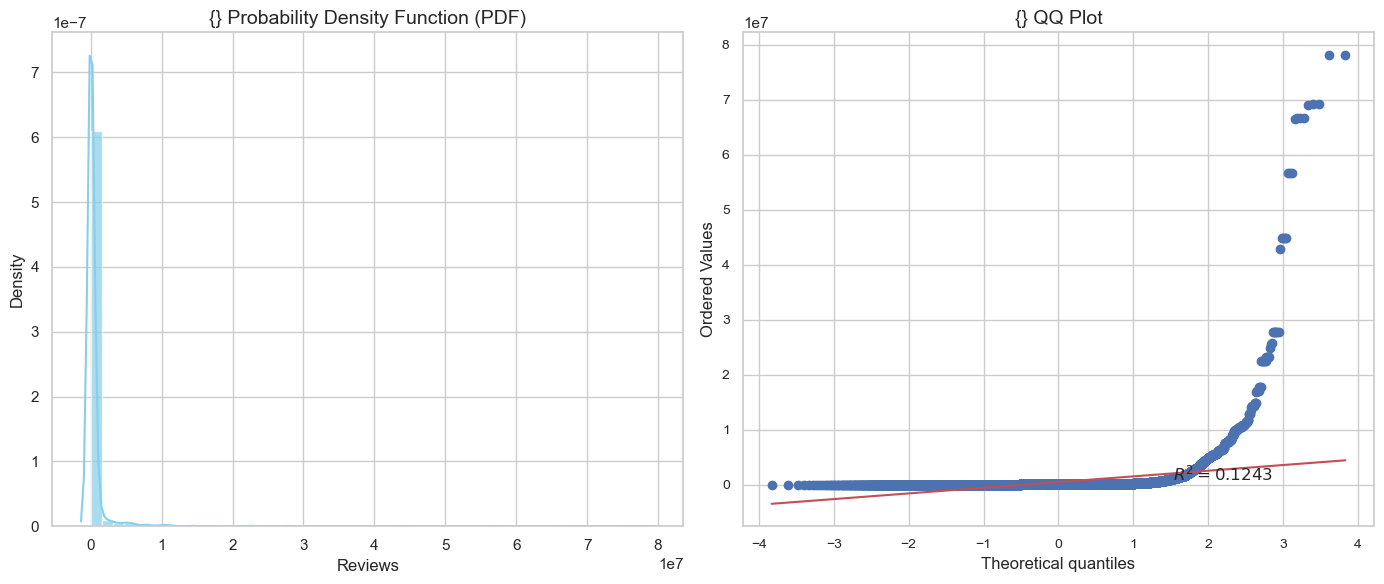

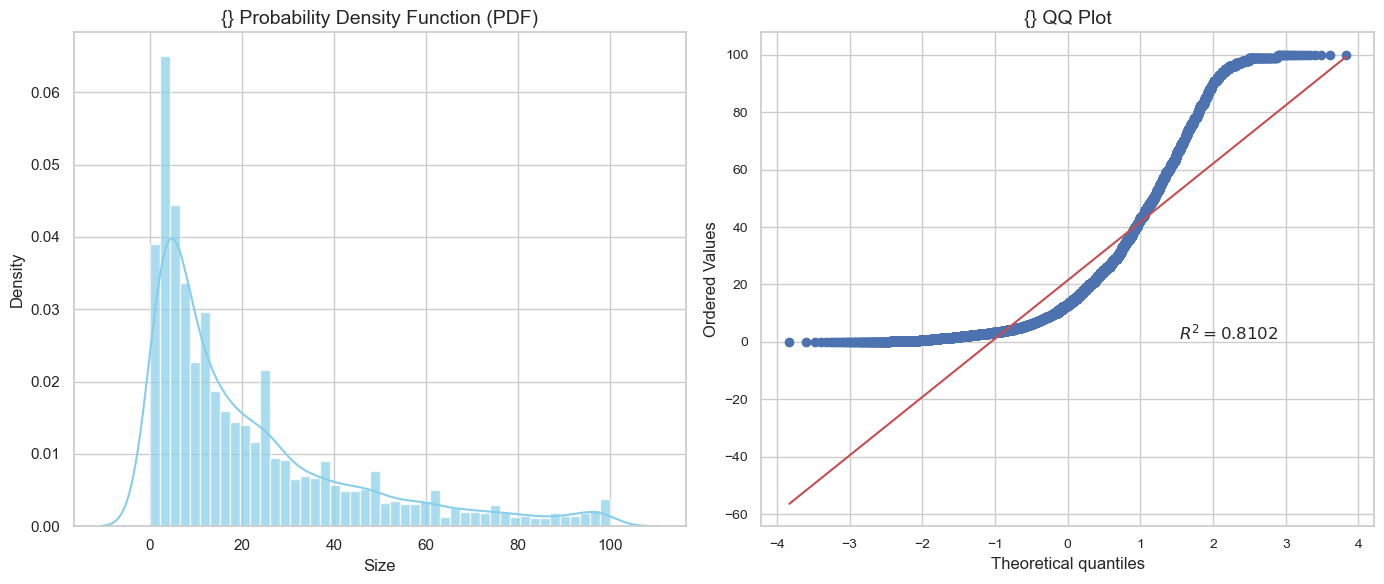

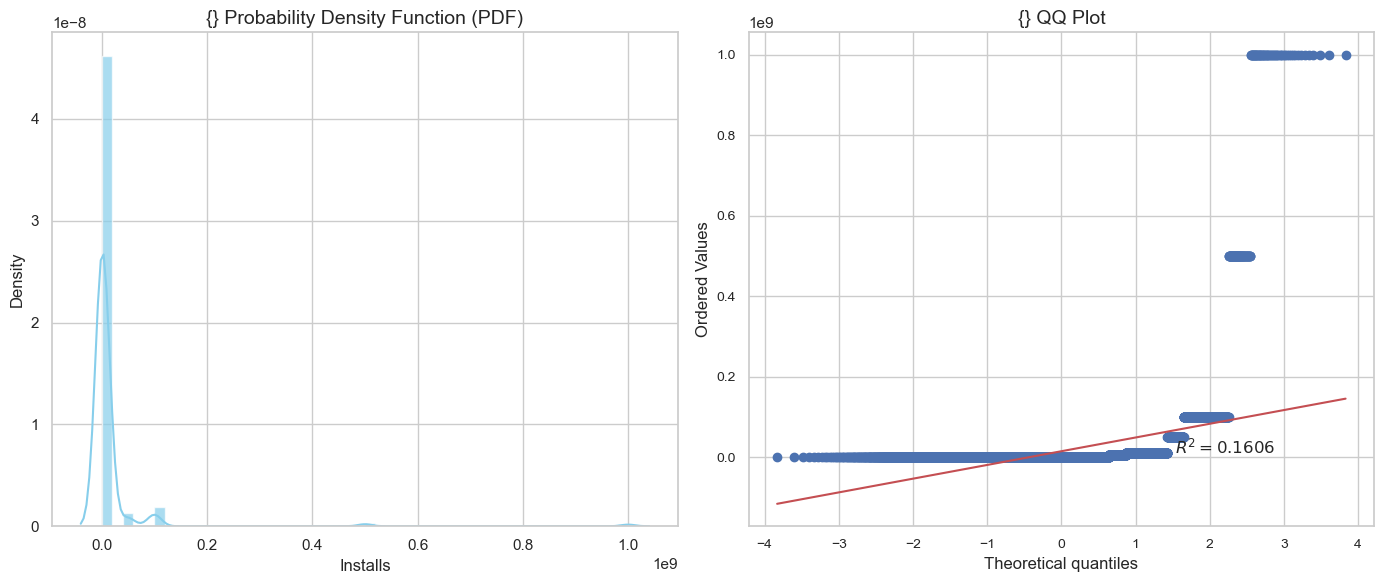

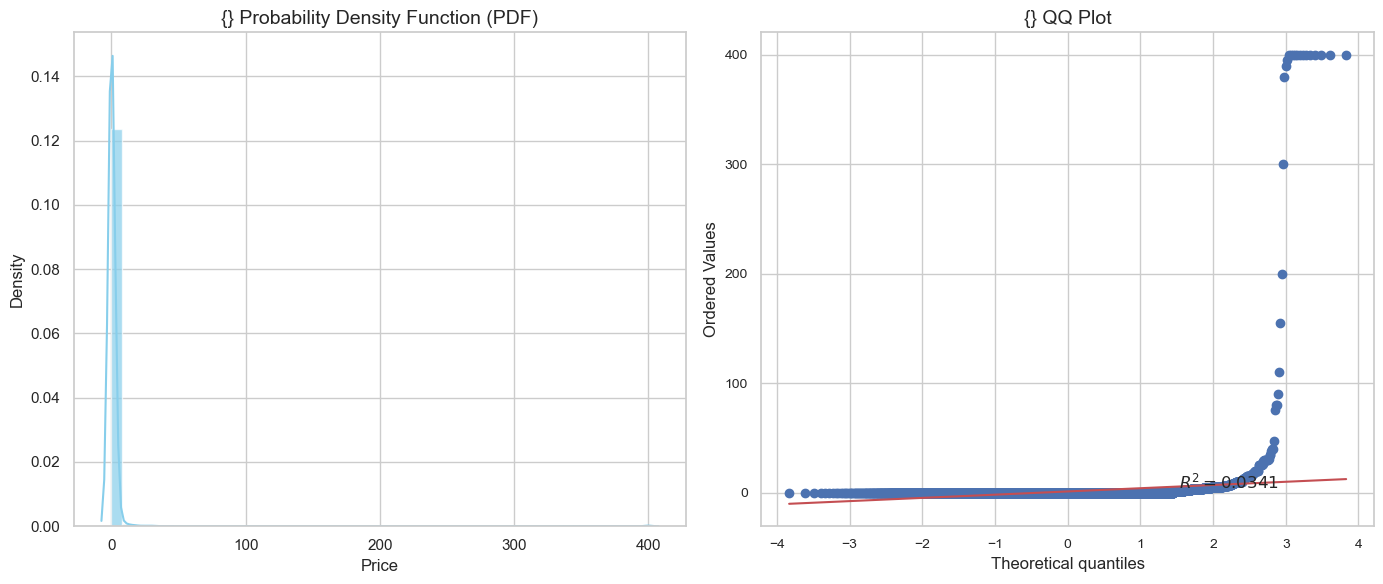

In [12]:
# Define a function to plot QQ and PDF
def plot_qq_plot(column):
    # Create a figure with subplots
    plt.figure(figsize=(14, 6))
    
    # Create the PDF plot
    plt.subplot(121)
    sns.set(style="whitegrid")
    sns.distplot(preprocessed_apps_data[column], color='skyblue', hist_kws={'alpha': 0.7})
    plt.title("{} Probability Density Function (PDF)", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Density", fontsize=12)
    
    # Create the QQ plot
    plt.subplot(122)
    stats.probplot(preprocessed_apps_data[column], dist="norm", plot=plt, rvalue=True)
    plt.title('{} QQ Plot', fontsize=14)
    
    # Remove unnecessary ticks and labels from the QQ plot
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    
    # Ensure tight layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Loop through your list of columns and create the plots
for col in features_to_plot:
    plot_qq_plot(col)

### Insights

- None of above Data falls in a straight line, thus the variable does not follows normal distribution.

<div style="text-align: center; background-color: yellow; padding: 10px;">
    <h2 style="font-weight: bold;">CHECK FOR NORMAL DISTRIBUTION USING TRANSFORMATIONS</h2>
</div>

In [13]:
def plots(preprocessed_apps_data, var, transformer):
    # Set a custom color palette
    custom_palette = sns.color_palette("husl")

    # Create a figure with two subplots
    plt.figure(figsize=(13, 5))

    # Plot the original data distribution
    plt.subplot(121)
    sns.kdeplot(preprocessed_apps_data[var], color=custom_palette[0])
    plt.title('Before Transformation')
    
    # Plot the transformed data distribution
    plt.subplot(122)
    sns.kdeplot(transformer, color=custom_palette[1])
    plt.title('After Transformation')

    # Add labels and titles
    plt.xlabel(var)
    plt.suptitle('Distribution Comparison', fontsize=16)
    
    # Add a legend
    plt.legend(['Original', 'Transformed'], loc='upper right')

    # Adjust the plot layout
    plt.tight_layout()

    # Show the plot
    plt.show()

## 1] Log Transformation

- **In Log transformation each variable of x will be replaced by log(x) with base 10, base 2, or natural log.**

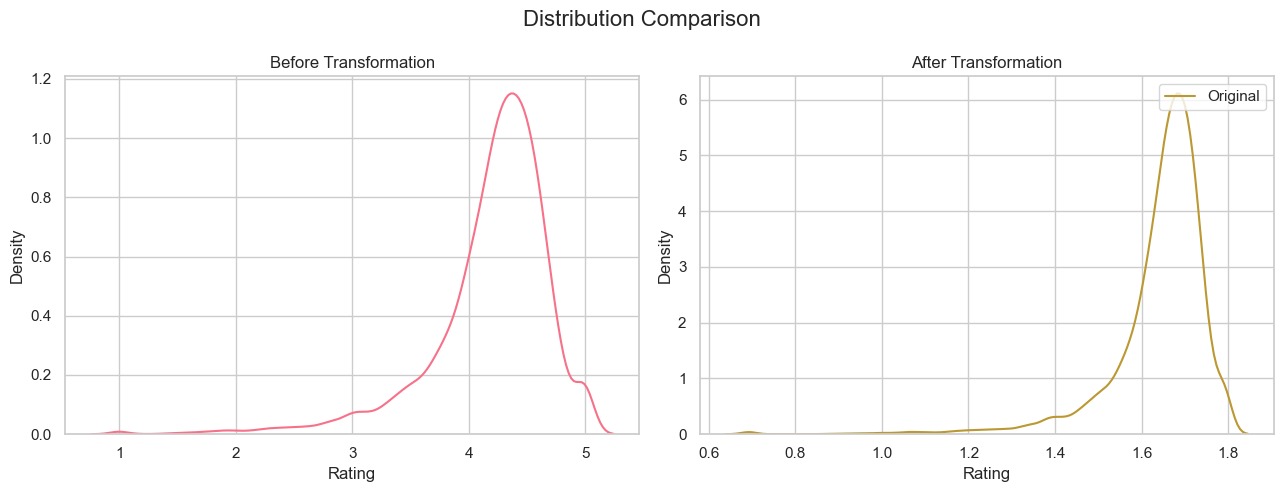

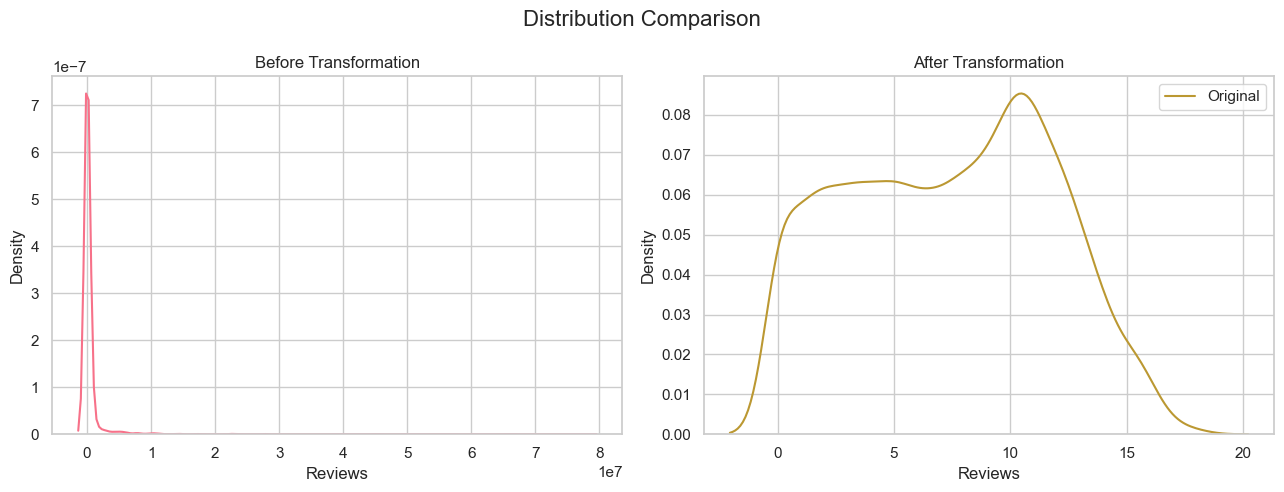

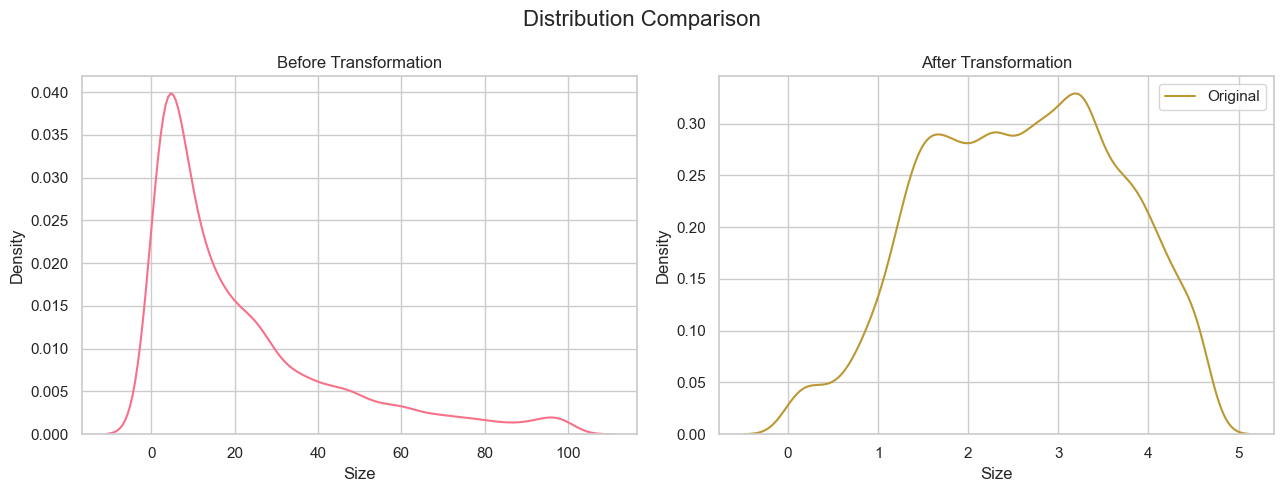

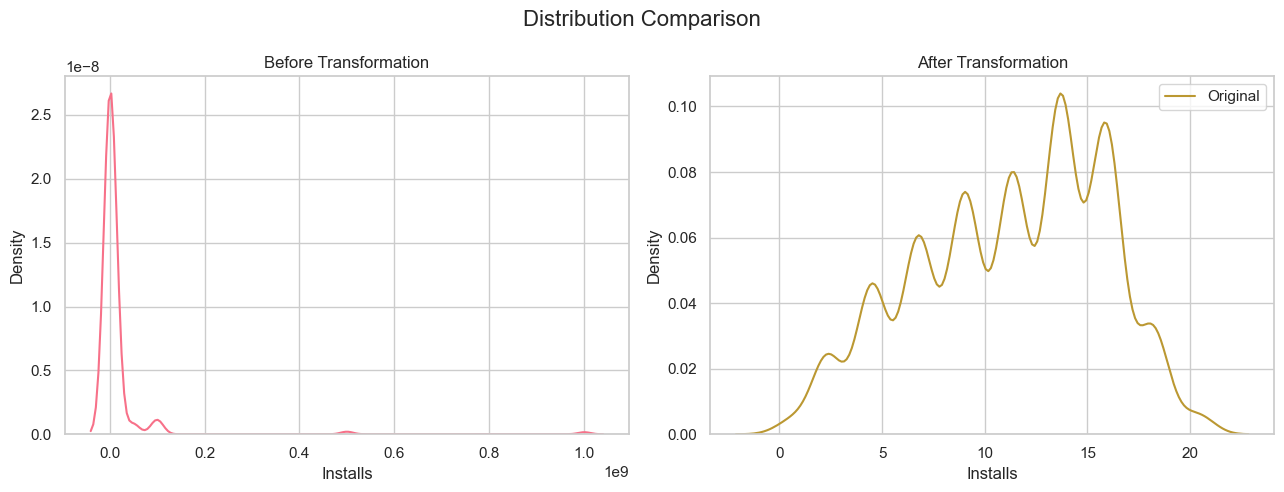

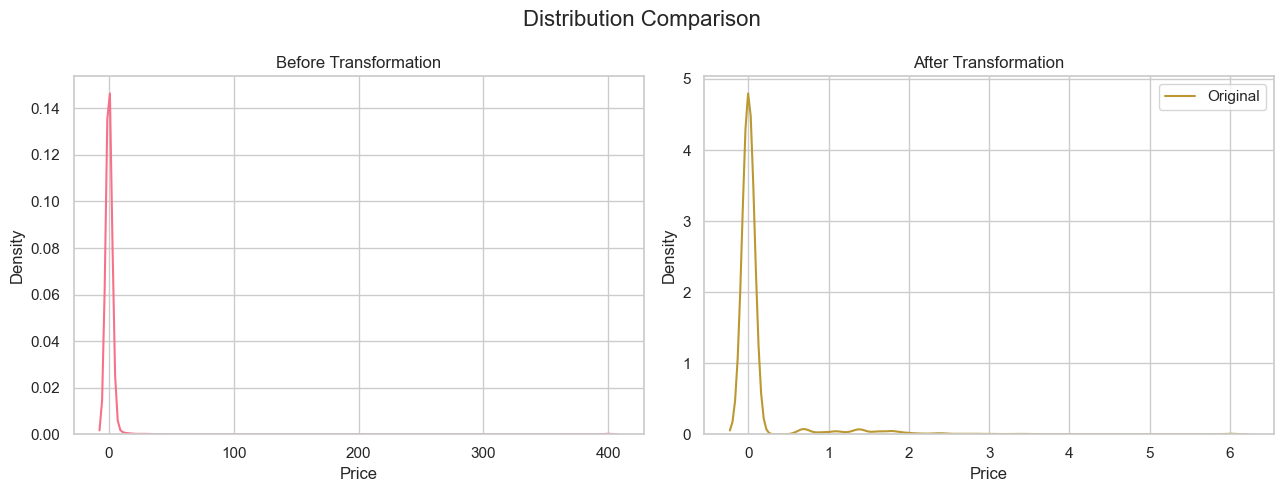

In [14]:
log_transformer = FunctionTransformer(np.log1p)
for col in features_to_plot:
    X = np.array(preprocessed_apps_data[col])
    Y = log_transformer.transform(X)
    plots(preprocessed_apps_data,col,Y)

### Insights

- For Reviews , Size and Install features Log tranformation has reduced skewness.

## 2] Square-Root Transformation

- **Here the x will replace by the square root(x). It is weaker than the Log Transformation.**
- **The main advantage of square root transformation is, it can be applied to zero values.**

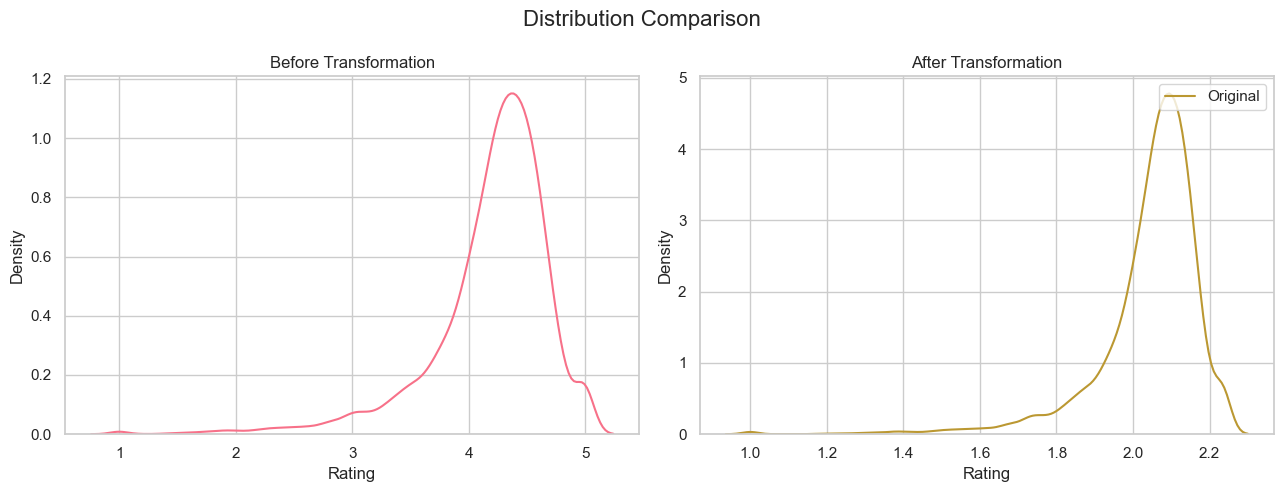

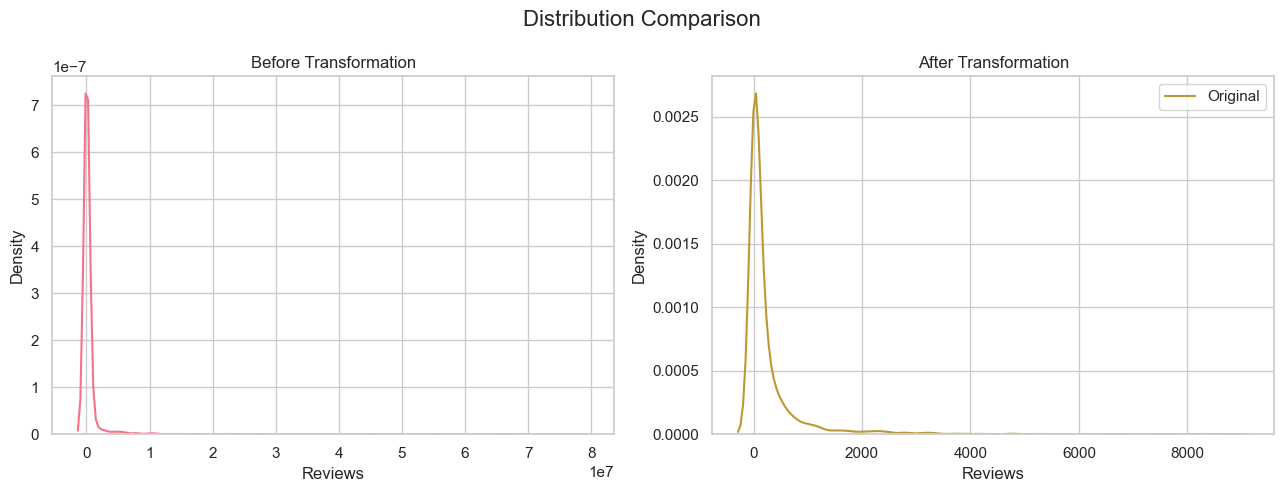

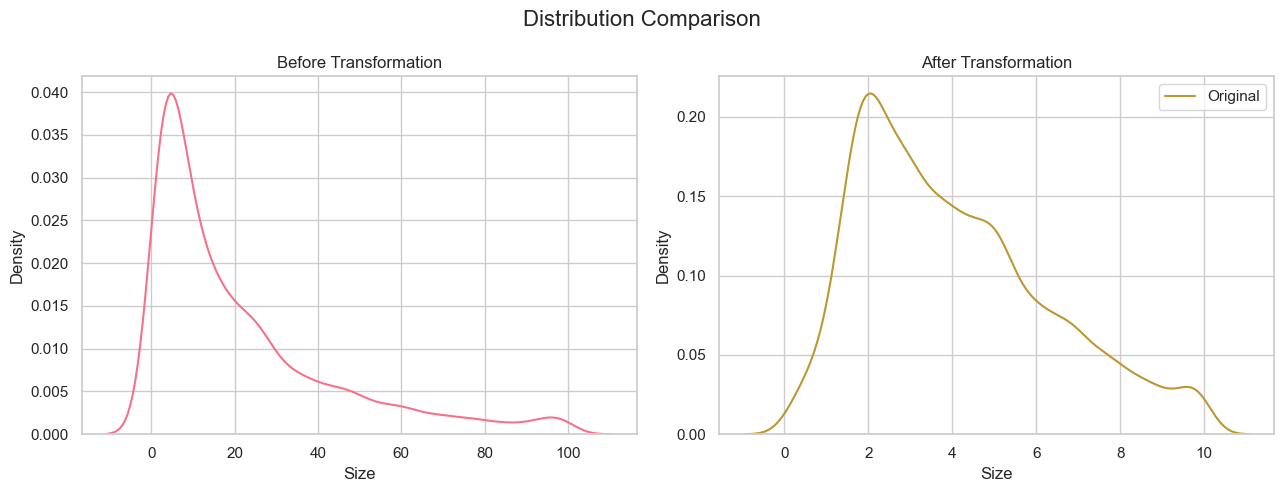

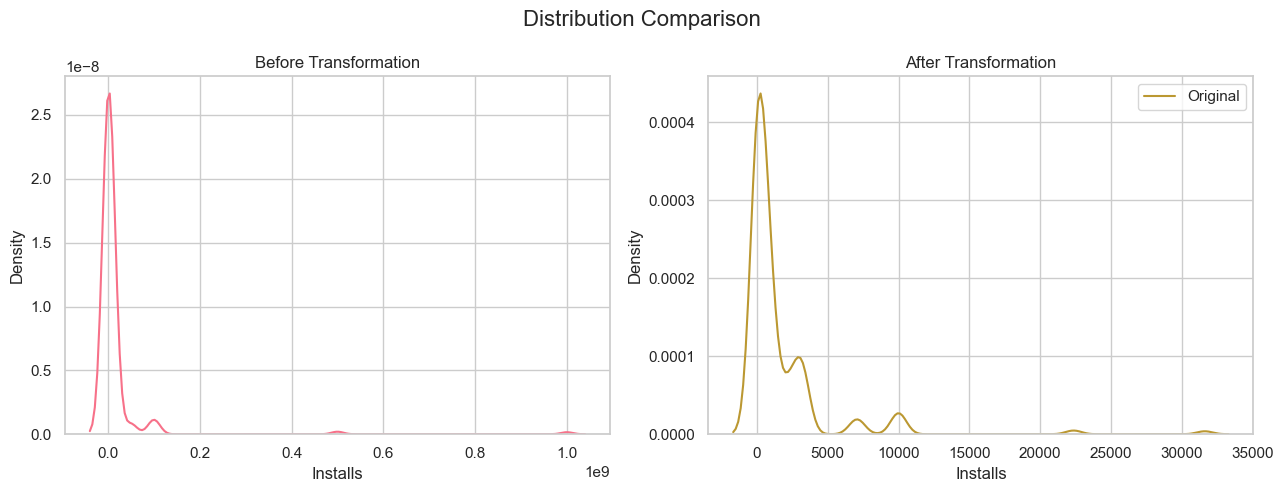

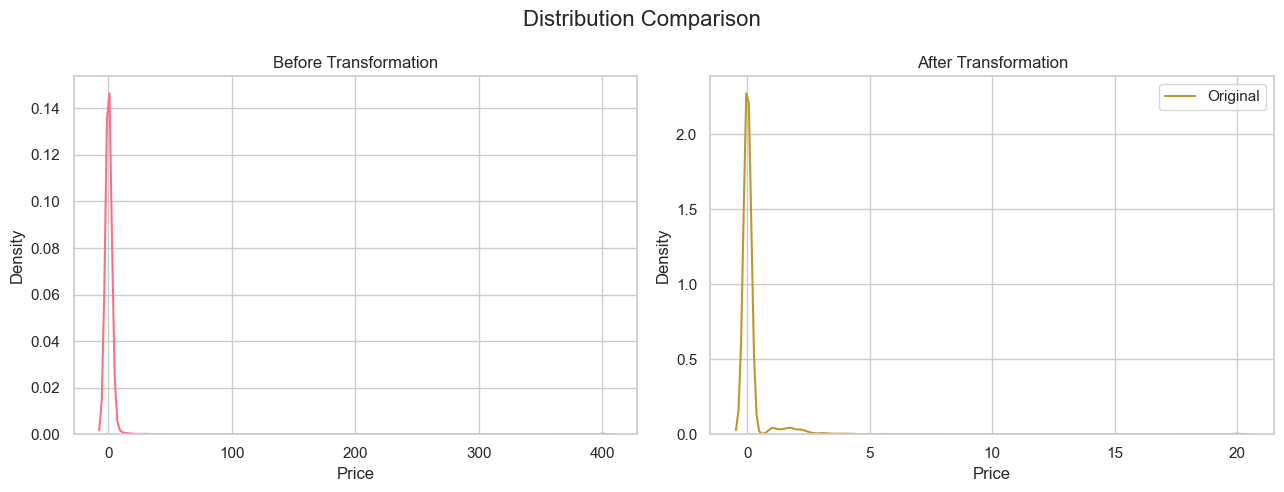

In [15]:
log_transformer = FunctionTransformer(np.sqrt)
for col in features_to_plot:
    X = np.array(preprocessed_apps_data[col])
    Y = log_transformer.transform(X)
    plots(preprocessed_apps_data,col,Y)

### Insights
- For our data Square root transformation is not working properly.
- Only sight change in Size distribution can be observed

## 3] Yeo-Johnson Transformation

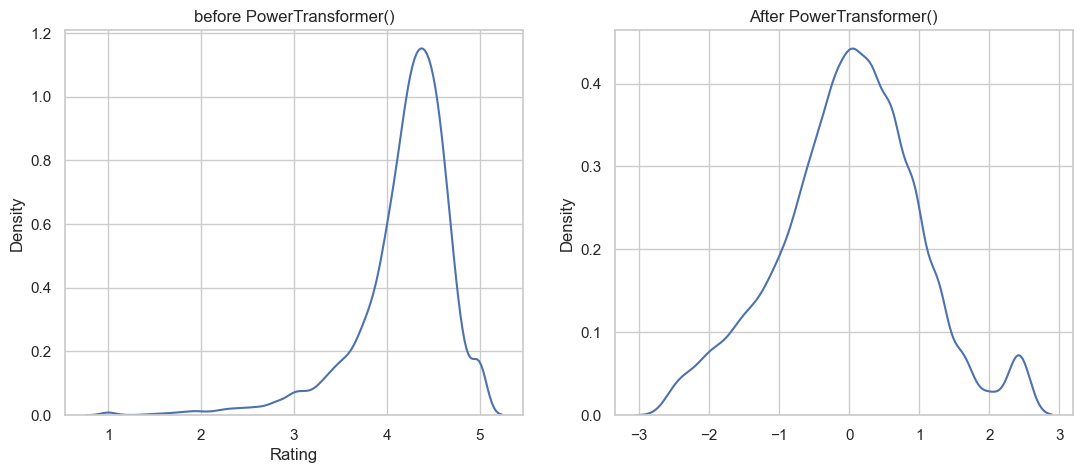

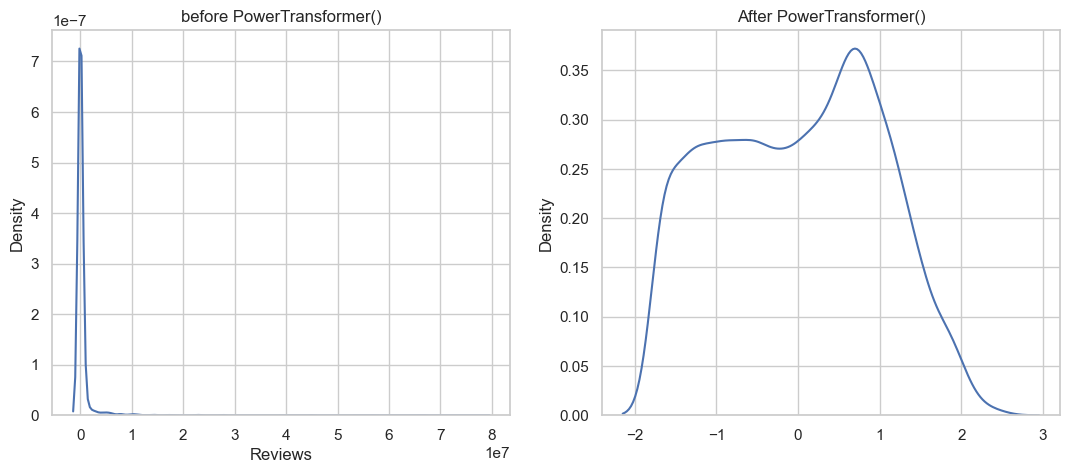

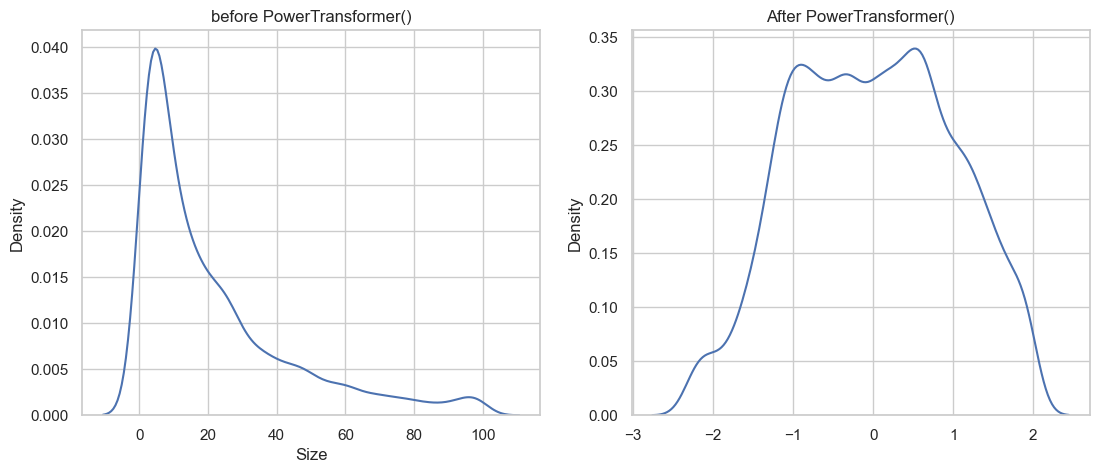

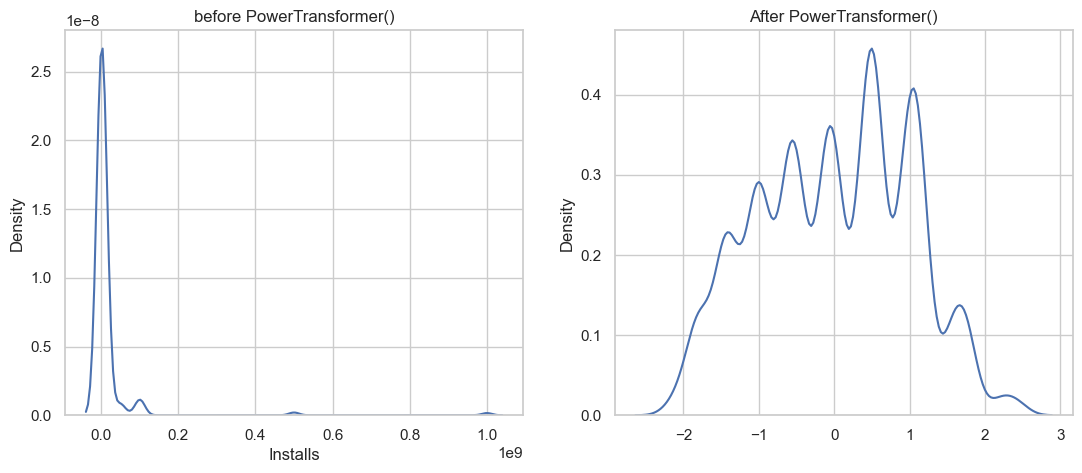

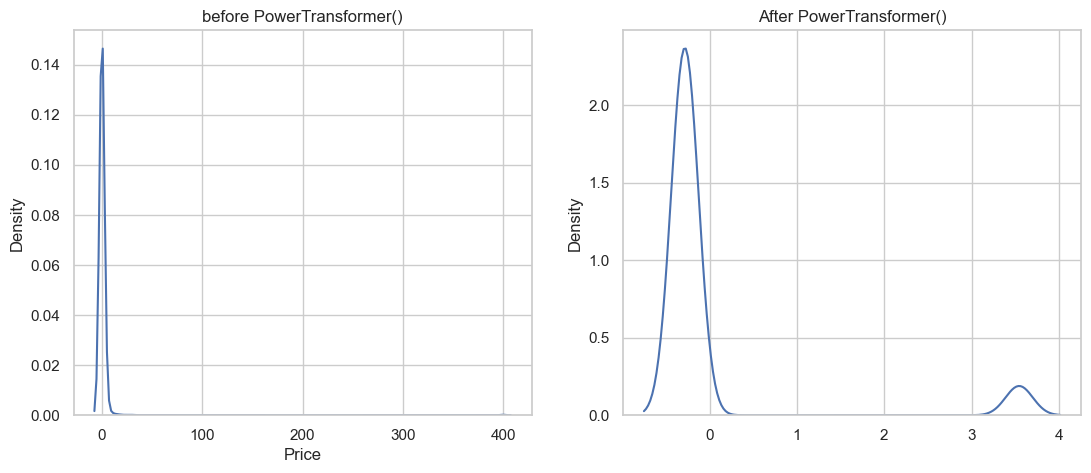

In [16]:
def power_plots(preprocessed_apps_data,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(preprocessed_apps_data[var])
    plt.title('before ' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(preprocessed_apps_data[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t))
for col in features_to_plot:
    power_plots(preprocessed_apps_data,col,PowerTransformer())

### Insights
- For our data Power transformation is working properly.